In [1]:
# includes
import pandas as pd
import numpy as np
import math
from random import sample
import matplotlib.pyplot as plt
import statistics


In [2]:
# read in the file
df = pd.read_csv('excelfile2.csv')

In [3]:
df
# column is a slice threw a different cell

,chrom,start,stop,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,chr1,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,30000,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,60000,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,90000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,120000,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,chr4_random,150000,160594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,chr3_random,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,chr3_random,30000,41899,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,chrM,0,16299,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# ############################################ Activity 1 ########################################################################
# number of genomic windows (rows)
print("Number of genomic windows:",df.shape[0])

# number of NP's (columns)
print("Number of NP's:",df.shape[1]-3)

# On average, how many windows are present in an NP? (how many 1's) 5482.81
col_sum = df.iloc[:,3:].sum() # get a dict of the columns with the sum

# get the total from the dict
total = 0
for i in range(0, len(col_sum)):
    total += col_sum[i]

print("Avg of windows present in NPs:",total/len(col_sum))

# smalled and biggest number in col sum
print("The smallest number of windows present in NP:",col_sum.min())
print("The largest number of windows present in NP:",col_sum.max())

# On average, what is the number of NPs in which a window is detected? The smallest? The largest? 
row_sum = df.iloc[:,3:].sum(axis=1)

total2 = 0
for i in range(0, len(row_sum)):
    total2 += row_sum[i]

print("Avg of NP's in windows:", total2/len(row_sum))
# smalled and biggest number in row sum
print("The smallest number of NPs present in windows:",row_sum.min())
print("The largest number of NPs present in windows:",row_sum.max())

Number of genomic windows: 90877
Number of NP's: 408
Avg of windows present in NPs: 5482.811274509804
The smallest number of windows present in NP: 31
The largest number of windows present in NP: 21249
Avg of NP's in windows: 24.615546287839607
The smallest number of NPs present in windows: 0
The largest number of NPs present in windows: 408


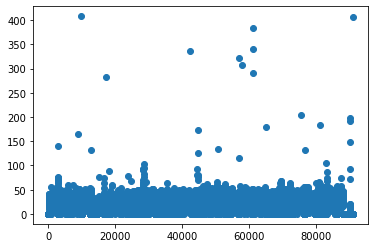

These are the outlier row indexes:  [9857, 17296, 42320, 56851, 57921, 60988, 60989, 60990, 90875]


In [5]:
# ############################################ Tue, Jan 18 Week 2, activity 2 #################################################################
# determine some outliers on the NPs that have windows
# so we make a scatter plot of row_sum
# get the list out of the dict:
tmp = []
tmp2 = []
for i in row_sum.values:
    tmp.append(i)
for i in row_sum.keys():
    tmp2.append(i)

plt.scatter(tmp2, tmp)
plt.show()

# after seeing the graph we can determine that anything above 250 is an outlier, get those rows from tmp2
row_outlier = []
for i in range(0, len(tmp)):
    if tmp[i] > 250:
        row_outlier.append(tmp2[i])

# output
print("These are the outlier row indexes: ", row_outlier)

# delete tmp vars, cleanup
del tmp2
del tmp

In [6]:
# Estimate radial position of each NP
# get the percent for max and divide that into 5 regions to label the entire col_sum list (windows in NP)
p2_percent = (col_sum.max() / df.shape[0]) * 100
print("The percent", p2_percent)

col_sum_divided = []
col_labeled = []
for i in col_sum:
    # get the actual percent in case we need it
    col_sum_divided.append((i / df.shape[0]) * 100)
    # get the label
    if ((i / df.shape[0]) * 100) <= 4.676:
        col_labeled.append(1) # 1 - strongly apical
    elif ((i / df.shape[0]) * 100) > 4.676 and ((i / df.shape[0]) * 100) <= 9.352:
        col_labeled.append(2) # 2 – somewhat apical
    elif ((i / df.shape[0]) * 100) > 9.352 and ((i / df.shape[0]) * 100) <= 14.028:
        col_labeled.append(3) # 3 – neither apical nor equatorial
    elif ((i / df.shape[0]) * 100) > 14.028 and ((i / df.shape[0]) * 100) <= 18.704:
        col_labeled.append(4) # 4 – somewhat equatorial
    elif ((i / df.shape[0]) * 100) > 18.704:
        col_labeled.append(5) # 5 – strongly equatorial

for i in range(5):
    print("column/slices %:",col_sum_divided[i], " , the radial position label for NP: ", col_labeled[i])
# notes
# the columns are slices
# the rows are cells

The percent 23.382153900326816
column/slices %: 6.466982844944265  , the radial position label for NP:  2
column/slices %: 8.325538915237079  , the radial position label for NP:  2
column/slices %: 5.444721986861363  , the radial position label for NP:  2
column/slices %: 4.2155881026002175  , the radial position label for NP:  1
column/slices %: 0.9199247334309012  , the radial position label for NP:  1


In [7]:
# Estimate compaction of each genomic window
p3_percent = (row_sum.max() / (df.shape[1]-3)) * 100
print("The percent", p3_percent)

compaction_perc = []
compaction_labeled = [] # give the window a compaction
for i in row_sum:
    # get the actual percent in case we need it
    compaction_perc.append((i / (df.shape[1] - 3)) * 100)
    # get the label
    if ((i / (df.shape[1] - 3)) * 100) <= 10:
        compaction_labeled.append(1) # least condense
    elif (((i / (df.shape[1] - 3)) * 100) > 10) and (((i / (df.shape[1] - 3)) * 100) <= 20):
        compaction_labeled.append(2)
    elif (((i / (df.shape[1] - 3)) * 100) > 20) and (((i / (df.shape[1] - 3)) * 100) <= 30):
        compaction_labeled.append(3)
    elif (((i / (df.shape[1] - 3)) * 100) > 30) and (((i / (df.shape[1] - 3)) * 100) <= 40):
        compaction_labeled.append(4)
    elif (((i / (df.shape[1] - 3)) * 100) > 40) and (((i / (df.shape[1] - 3)) * 100) <= 50):
        compaction_labeled.append(5)
    elif (((i / (df.shape[1] - 3)) * 100) > 50) and (((i / (df.shape[1] - 3)) * 100) <= 60):
        compaction_labeled.append(6)
    elif (((i / (df.shape[1] - 3)) * 100) > 60) and (((i / (df.shape[1] - 3)) * 100) <= 70):
        compaction_labeled.append(7)
    elif (((i / (df.shape[1] - 3)) * 100) > 70) and (((i / (df.shape[1] - 3)) * 100) <= 80):
        compaction_labeled.append(8)
    elif (((i / (df.shape[1] - 3)) * 100) > 80) and (((i / (df.shape[1] - 3)) * 100) <= 90):
        compaction_labeled.append(9)
    elif (((i / (df.shape[1] - 3)) * 100) > 90):
        compaction_labeled.append(10) # most condense

for i in range(5):
    print("Window compaction %:",compaction_perc[i], " , the window compaction label: ", compaction_labeled[i])


The percent 100.0
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1
Window compaction %: 0.0  , the window compaction label:  1


In [8]:
############################################### Thur, Jan 20 Week 2, activity 3 #############################################################
# load in the new copied rows 
activity3df = pd.read_csv('activity3.csv')

# go through those columns in the new df and delete the columns without any 1's
act3_col_sum = activity3df.iloc[:,3:].sum()

del_col = []
del_col2 = []
for i in range(0, len(act3_col_sum)):
    if act3_col_sum[i] == 0:
        del_col.append(i)
        del_col2.append(i+3)
        
# end of loop

new_act3_df = activity3df.drop(activity3df.columns[del_col2], axis=1)

# Question 1:
print("Number of windows(rows):", new_act3_df.shape[0]) 

# Question 2:     
print("Number of NP's (columns):", new_act3_df.shape[1]-3)  

# Question 3: On average, how many windows are present in an NP?
wind_sum = new_act3_df.iloc[:,3:].sum(axis=1)
np_sum = new_act3_df.iloc[:,3:].sum()

print("Windows(rows) presented in a NP(col):", sum(np_sum)/len(np_sum))

# Question 4: Smallest/largest windows in NP
print("Smallest number of windows in NP:",np_sum.min())
print("Largest number of windows in NP:",np_sum.max())

# Question 5: On average, what is the number of NPs in which a window is detected? The smallest? The largest? 
print("Avg number of Np's in which a window is detected:", sum(wind_sum)/len(wind_sum))
print("Smallest number of NP's that detect a window:",wind_sum.min())
print("Largest number of NP's that detect a window:",wind_sum.max())

# Question 6: What are the most common radial positions of the Hist1 region? (Based on the NPs that captured the region.)
# get the section of radial cuts from the section
sectioned_radial = []
for i in range(0, len(col_labeled)):
    if i not in del_col:
        sectioned_radial.append(col_labeled[i])

# make a dictionary of how much each number has
radial_dict = {1:0, 2:0, 3:0, 4:0, 5:0}
# put vals in dict
for i in sectioned_radial:
    if i == 1:
        radial_dict[1] = radial_dict[1] + 1
    elif i == 2:
        radial_dict[2] = radial_dict[2] + 1
    elif i == 3:
        radial_dict[3] = radial_dict[3] + 1
    elif i == 4:
        radial_dict[4] = radial_dict[4] + 1
    elif i == 5:
        radial_dict[5] = radial_dict[5] + 1

print("Amount of radial position for each number:",radial_dict)

# Question 7: What are the typical compactions of the windows within the Hist1 region?
# starting row
# chr13 21690000	21720000 -> 69714
# ending row
# chr13	24090000	24120000 -> 69794
# go through and grab the rows we need
sectioned_compaction = []
for i in range(69717, 69798):
    sectioned_compaction.append(compaction_labeled[i])
# end of for

# dict of compaction, see how many of each number there is
compaction_dict = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
# put the compaction numbers into the dict
for i in sectioned_compaction:
    if i == 1:
        compaction_dict[1] = compaction_dict[1] + 1
    elif i == 2:
        compaction_dict[2] = compaction_dict[2] + 1
    elif i == 3:
        compaction_dict[3] = compaction_dict[3] + 1
    elif i == 4:
        compaction_dict[4] = compaction_dict[4] + 1
    elif i == 5:
        compaction_dict[5] = compaction_dict[5] + 1
    elif i == 6:
        compaction_dict[6] = compaction_dict[6] + 1
    elif i == 7:
        compaction_dict[7] = compaction_dict[7] + 1
    elif i == 8:
        compaction_dict[8] = compaction_dict[8] + 1
    elif i == 9:
        compaction_dict[9] = compaction_dict[9] + 1
    elif i == 10:
        compaction_dict[10] = compaction_dict[10] + 1
# end of loop
print("Amount of compaction per each number:",compaction_dict)

# Sum of what i did
# Q6 - i go through and delete the columns (NP's) that doesnt have any windows present. I then go through the radials that i already categorized 
# in activity 2. I select the columns that arent 0 and grabbed them, added them to a dict
# Q7 - I did the same, take the rows from the activity 2 labeled rows and add to dict

Number of windows(rows): 81
Number of NP's (columns): 163
Windows(rows) presented in a NP(col): 15.141104294478527
Smallest number of windows in NP: 1
Largest number of windows in NP: 69
Avg number of Np's in which a window is detected: 30.469135802469136
Smallest number of NP's that detect a window: 0
Largest number of NP's that detect a window: 42
Amount of radial position for each number: {1: 49, 2: 69, 3: 34, 4: 8, 5: 3}
Amount of compaction per each number: {1: 79, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


In [40]:
############################################### Tues, Jan 25 Week 3, activity 4 #############################################################
# using the sections from activity 3 we will do the jaccard index for each pair of relevant NP's
# make a dataframe
act4_jaccard_index = df.iloc[:163, :163]
act4_jaccard_index.columns = new_act3_df.iloc[:,3:].columns.values
act4_jaccard_index.index = new_act3_df.iloc[:,3:].columns.values

# m11 = represents the total number of attributes where A and B both have a value of 1.
# m01 = represents the total number of attributes where the attribute of A is 0 and the attribute of B is 1
# m10 = represents the total number of attributes where the attribute of A is 1 and the attribute of B is 0.
# m00 = represents the total number of attributes where A and B both have a value of 0.
# j = m11 / (m01 + m10 + m11)
for i in range(0, 163):
    for j in range(0, 163):
        tmp_list = []
        m11, m01, m10, m00 = 0, 0, 0, 0
        for k in range(0, new_act3_df.shape[0]):
            if (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 1):
                m11 += 1
            elif (new_act3_df.iloc[k, i+3] == 0) and (new_act3_df.iloc[k, j+3] == 1):
                m01 += 1
            elif (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 0):
                m10 += 1
            elif (new_act3_df.iloc[k, i+3] == 0) and (new_act3_df.iloc[k, j+3] == 0):
                m00 += 1
            # print(new_act3_df.iloc[k, i+3], " ", new_act3_df.iloc[k, j+3])
        # end of k
        jac_index = m11 / (m01 + m10 + m11)
        act4_jaccard_index.iloc[i,j] = jac_index
    # end of j
# end of i

# note on this:
# we do +3 on the m calculations so we dont get the first couple columns in the other matrix cause it has useless info

# printout
act4_jaccard_index

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
F10A3,1,0.023810,0.000000,0.453333,0.023810,0.424658,0.130435,0.350877,0.000000,0.000000,...,0.023810,0.181818,0.000000,0.224490,0.096154,0.133333,0.108696,0.333333,0.259259,0.266667
F10A5,0.0238095,1.000000,0.000000,0.014925,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000
F10B3,0,0.000000,1.000000,0.014925,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F10B5,0.453333,0.014925,0.014925,1.000000,0.014925,0.697368,0.149254,0.436620,0.014925,0.014925,...,0.014925,0.149254,0.014925,0.268657,0.205882,0.117647,0.117647,0.500000,0.291667,0.205882
F10C1,0.0238095,0.000000,0.000000,0.014925,1.000000,0.016129,0.100000,0.028571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.026316,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D3,0.133333,0.000000,0.000000,0.117647,0.000000,0.145161,0.000000,0.257143,0.000000,0.000000,...,0.000000,0.117647,0.000000,0.080000,0.142857,1.000000,0.500000,0.175000,0.000000,0.000000
F9D6,0.108696,0.000000,0.000000,0.117647,0.111111,0.145161,0.055556,0.222222,0.000000,0.000000,...,0.000000,0.055556,0.000000,0.080000,0.142857,0.500000,1.000000,0.146341,0.000000,0.000000
F9F2,0.333333,0.000000,0.000000,0.500000,0.026316,0.470588,0.090909,0.431373,0.026316,0.026316,...,0.000000,0.066667,0.000000,0.166667,0.177778,0.175000,0.146341,1.000000,0.185185,0.104167
F9F3,0.259259,0.038462,0.000000,0.291667,0.000000,0.333333,0.090909,0.109091,0.038462,0.038462,...,0.038462,0.125000,0.038462,0.222222,0.138889,0.000000,0.000000,0.185185,1.000000,0.171429


In [48]:
############################################### Tues, Jan 27 Week 3, activity 5 #############################################################
# use the last dataframe and the formula Jdist = 1 - J for the jaccard distance
act5_Jdist_df = act4_jaccard_index

# go through the df and replace each value with 1 - J
for i in range(0, act5_Jdist_df.shape[0]):
    for j in range(0, act5_Jdist_df.shape[1]):
        Jdist = 1 - act5_Jdist_df.iloc[i,j]
        act5_Jdist_df.iloc[i,j] = Jdist
    # end of j
# end of i

# ouput
act5_Jdist_df

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
F10A3,0,0.976190,1.000000,0.546667,0.976190,0.575342,0.869565,0.649123,1.000000,1.000000,...,0.976190,0.818182,1.000000,0.775510,0.903846,0.866667,0.891304,0.666667,0.740741,0.733333
F10A5,0.97619,0.000000,1.000000,0.985075,1.000000,0.983871,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000
F10B3,1,1.000000,0.000000,0.985075,1.000000,0.983871,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
F10B5,0.546667,0.985075,0.985075,0.000000,0.985075,0.302632,0.850746,0.563380,0.985075,0.985075,...,0.985075,0.850746,0.985075,0.731343,0.794118,0.882353,0.882353,0.500000,0.708333,0.794118
F10C1,0.97619,1.000000,1.000000,0.985075,0.000000,0.983871,0.900000,0.971429,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.888889,0.973684,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D3,0.866667,1.000000,1.000000,0.882353,1.000000,0.854839,1.000000,0.742857,1.000000,1.000000,...,1.000000,0.882353,1.000000,0.920000,0.857143,0.000000,0.500000,0.825000,1.000000,1.000000
F9D6,0.891304,1.000000,1.000000,0.882353,0.888889,0.854839,0.944444,0.777778,1.000000,1.000000,...,1.000000,0.944444,1.000000,0.920000,0.857143,0.500000,0.000000,0.853659,1.000000,1.000000
F9F2,0.666667,1.000000,1.000000,0.500000,0.973684,0.529412,0.909091,0.568627,0.973684,0.973684,...,1.000000,0.933333,1.000000,0.833333,0.822222,0.825000,0.853659,0.000000,0.814815,0.895833
F9F3,0.740741,0.961538,1.000000,0.708333,1.000000,0.666667,0.909091,0.890909,0.961538,0.961538,...,0.961538,0.875000,0.961538,0.777778,0.861111,1.000000,1.000000,0.814815,0.000000,0.828571


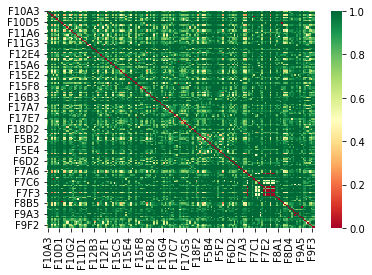

In [51]:
# make a heat map of Jaccard index
# heat map lib
import seaborn as sns 
# convert all columns to float cause the first column wasnt
tmpdf = act4_jaccard_index.astype('float')
# actual plot
sns.heatmap(tmpdf, cmap ='RdYlGn')
# delete temp variable
del tmpdf

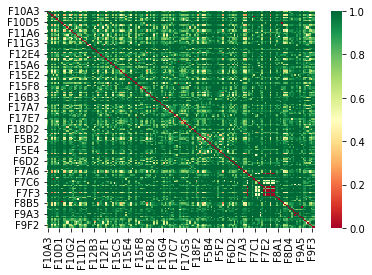

In [54]:
# make a heat map of Jdist
# convert all columns to float cause the first column wasnt
tmpdf = act5_Jdist_df.astype('float')
# actually plot
sns.heatmap(tmpdf, cmap ='RdYlGn')
# delete the tmp var
del tmpdf 

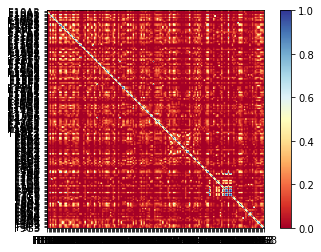

In [ ]:
# other heat map lib
import matplotlib.pyplot as plt
plt.imshow(act4_jaccard_index.iloc[:, 1:163], cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(act4_jaccard_index)), act4_jaccard_index.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(act4_jaccard_index)), act4_jaccard_index.index)
  
# Displaying the figure
plt.show()

In [89]:
# make a dataframe
tmpdf = df.iloc[:163, :163]
tmpdf.columns = new_act3_df.iloc[:,3:].columns.values
tmpdf.index = new_act3_df.iloc[:,3:].columns.values

# m11 = represents the total number of attributes where A and B both have a value of 1.
# m01 = represents the total number of attributes where the attribute of A is 0 and the attribute of B is 1
# m10 = represents the total number of attributes where the attribute of A is 1 and the attribute of B is 0.
# m00 = represents the total number of attributes where A and B both have a value of 0.
# j = m11 / (m01 + m10 + m11)
for i in range(0, 163):
    for j in range(0, 163):
        m11, m01, m10 = float(0), float(0), float(0)
        for k in range(0, new_act3_df.shape[0]):
            if (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 1):
                m11 += 1
                m10 += 1
                m01 += 1
            elif (new_act3_df.iloc[k, i+3] == 0) and (new_act3_df.iloc[k, j+3] == 1):
                m01 += 1
            elif (new_act3_df.iloc[k, i+3] == 1) and (new_act3_df.iloc[k, j+3] == 0):
                m10 += 1
            # print(new_act3_df.iloc[k, i+3], " ", new_act3_df.iloc[k, j+3])
        # end of k
        tmpdf.iloc[i,j] = float(m11 / min(m10, m01))
    # end of j
# end of i

# note on this:
# we do +3 on the m calculations so we dont get the first couple columns in the other matrix cause it has useless info

# printout
tmpdf

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
F10A3,1,1,0,0.809524,1,0.738095,0.600000,0.571429,0,0,...,1,0.800000,0,0.611111,0.333333,0.666667,0.555556,0.526316,0.538462,0.800000
F10A5,1,1,0,1.000000,0,1.000000,0.000000,0.000000,0,0,...,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
F10B3,0,0,1,1.000000,0,1.000000,0.000000,0.000000,0,0,...,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F10B5,0.809524,1,1,1.000000,1,0.854839,1.000000,0.885714,1,1,...,1,1.000000,1,1.000000,0.933333,0.888889,0.888889,0.921053,0.807692,0.933333
F10C1,1,0,0,1.000000,1,1.000000,1.000000,1.000000,0,0,...,0,0.000000,0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D3,0.666667,0,0,0.888889,0,1.000000,0.000000,1.000000,0,0,...,0,0.222222,0,0.222222,0.333333,1.000000,0.666667,0.777778,0.000000,0.000000
F9D6,0.555556,0,0,0.888889,1,1.000000,0.111111,0.888889,0,0,...,0,0.111111,0,0.222222,0.333333,0.666667,1.000000,0.666667,0.000000,0.000000
F9F2,0.526316,0,0,0.921053,1,0.842105,0.400000,0.628571,1,1,...,0,0.300000,0,0.444444,0.533333,0.777778,0.666667,1.000000,0.384615,0.333333
F9F3,0.538462,1,0,0.807692,0,0.846154,0.300000,0.230769,1,1,...,1,0.400000,1,0.444444,0.333333,0.000000,0.000000,0.384615,1.000000,0.400000


In [131]:
############################################### Mon, Feb 1st Week 4, activity 6 #############################################################
# step 1 - randomly select k = 3 points to be the initial cluster
import random

# get 3 random points
def get_points():
    tmparr = []
    p1, p2, p3 = random.sample(range(0, 163), 3)
    tmparr.append(p1)
    tmparr.append(p2)
    tmparr.append(p3)
    return tmparr
# end of get_points

points = get_points()
print("These are the 3 init points:",points[0], points[1], points[2])


# step 2/3 - measure the distance between the 3 initial points and other NP's then assign the NPs to the closest cluster. 
# we measure the distance using normalized jaccard similarity: m11 / min(a,b), where A is a new NP and B is the 3 initial cluster points picked at random. 
# we see which gives us the lowest value and then assign it to that cluster
c1, c2, c3 = [], [], []
def get_jaccardsimilarity(tmpdf, points, c1, c2, c3):
    # get the 3 clusters columns for comparing distances to
    jac_p1 = tmpdf.iloc[:, points[0]].sum()
    jac_p2 = tmpdf.iloc[:, points[1]].sum()
    jac_p3 = tmpdf.iloc[:, points[2]].sum()
    
    # go through all the columns
    for i in range(3, tmpdf.shape[1]):
        # dont go over the init cluster
        if i != points[0] and i != points[1] and i != points[2]:
            # get column to compare
            a = tmpdf.iloc[:, i].sum()
            
            # calculate the distance m11 / min(a,b)
            m11_p1 = (a + jac_p1) / (min(a, jac_p1)) 
            m11_p2 = (a + jac_p2) / (min(a, jac_p2)) 
            m11_p3 = (a + jac_p3) / (min(a, jac_p3)) 
            
            # see where its closest too and add it to that list
            if m11_p1 < m11_p2 and m11_p1 < m11_p3:
                c1.append(tmpdf.columns[i])
            elif m11_p2 < m11_p1 and m11_p2 < m11_p3:
                c2.append(tmpdf.columns[i])
            elif m11_p3 < m11_p1 and m11_p3 < m11_p2:
                c3.append(tmpdf.columns[i])
        # end of if
    # end of i
# end of function   

get_jaccardsimilarity(new_act3_df, points, c1, c2, c3)
print(len(c1), len(c2), len(c3))

# step 4 - find the center (medoid) of each cluster

These are the 3 init points: 141 109 78
39 61 60


In [120]:
# Note:
# - make 3 dataframes of 75x75, 25x25, 63x63
# - present 11am tuesday

In [105]:
# treat points as in the columns and our points that go into clusters are columns as well
# take the sum of the columns and (total of 2 sums / min of the two column sums)
new_act3_df

,chrom,start,stop,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
0,chr13,21690000,21720000,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,chr13,21720000,21750000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,chr13,21750000,21780000,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,chr13,21780000,21810000,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4,chr13,21810000,21840000,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,chr13,23970000,24000000,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
77,chr13,24000000,24030000,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,1,0,0
78,chr13,24030000,24060000,0,0,0,1,0,1,0,...,0,0,0,0,1,1,1,1,0,0
79,chr13,24060000,24090000,1,0,0,1,0,1,0,...,0,1,0,0,1,1,1,1,0,0
